## Workshop 2: Data Visualization
*Saarang Panchavati and Abhinav Pottabathula*


Hello! Welcome to a brief workshop on data visualization. This one will cover the basics of data visualization using matplotlib and seaborn. After this, we'll move on to actually looking at EEG data!

In [92]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

***

### Matplotlib

matplotlib is the industry standard for plotting and data visualization, it is the engine that drives most data visualization libraries. Read the documentation [here](https://matplotlib.org/3.1.1/users/index.html)

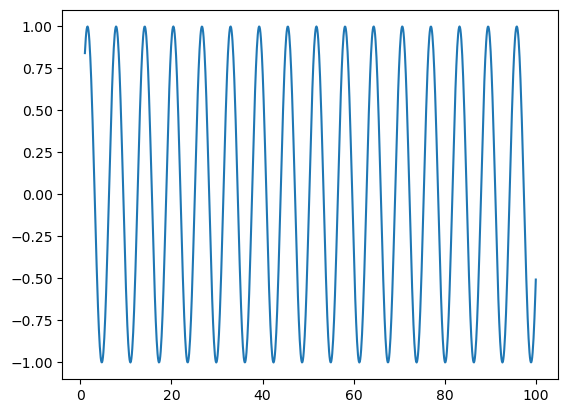

In [93]:
#lets make some data
x = np.linspace(1,100,1000) #generates 1000 points between 1 and 100
y = np.sin(x)

#now lets plot it! Look how easy it is
plt.plot(x,y); #plots x against y, as a line graph

In [94]:
mpg = sns.load_dataset('mpg') #load a miles per gallon dataset in pandas
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Now you try! In the cell below, try plotting mpg vs horsepower using the above syntax! Notice that a linegraph doesn't really make much sense, and doesn't really give us a good sense of the data. 

Instead, we can change the code to `plt.scatter`. Try it in the cell below! Look how nice it looks now! We can really see some sort of trend in the data. 

Another useful function in matlab is the `hist` function. We can use it to explore distributions in the data for columns we choose. In the cell below, see what you can find about the distribution of horsepower in our dataset! Which way is the data skewed?

Now lets quickly look at some pandas stuff!

In [95]:
#Lets explore how the mean mpg changed over the years

#first we group our dataframe by years, and find the means (the agg function to use is np.mean)
grouped = #your code here!
plt.plot(grouped);

#we can add a title and some labels easily
plt.title('model_year vs. mpg')
plt.ylabel('mpg')
plt.xlabel('year');

SyntaxError: invalid syntax (<ipython-input-95-18ee05201aee>, line 4)

Matplotlib has a lot of other functionality! I'll briefly zoom over it in the cell next couple of cells below, but we won't spend too much time on it — it is fairly intuitive

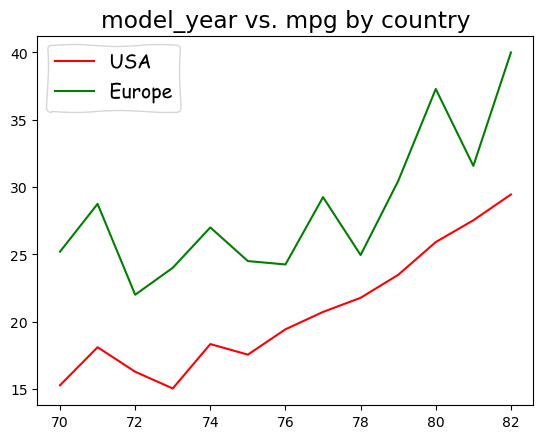

In [96]:
#plot multiple graphs on top of each other!
#Say we want to compare how the mpg of US cars has changed over the years to how the mpg of European cars has changed

#if you have any questions about the pandas stuff I do, let me know!
usdf = mpg[mpg['origin'] == 'usa'].groupby('model_year').agg(np.mean)['mpg']
eudf = mpg[mpg['origin'] == 'europe'].groupby('model_year').agg(np.mean)['mpg']

#all we need to do is just stack the plot commands, and add a label how nifty! 

#also you can change colors
plt.plot(usdf,'r',label = 'USA')
plt.plot(eudf,'g',label = 'Europe')

#also we can make them look like xkcd comics lol
plt.xkcd()

plt.title('model_year vs. mpg by country')
plt.legend(); #this shows the legend;

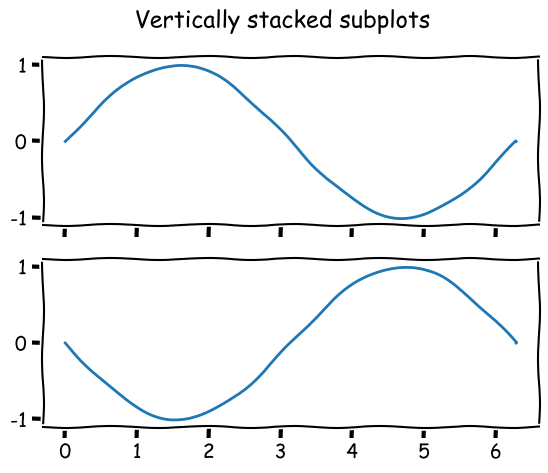

In [97]:
#Finally, matplot can be used to graph subplots like such 

x = np.linspace(0,2*np.pi,400)
y = np.sin(x)

fig, axs = plt.subplots(2,sharex = True) #we make them share the x axis
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y);

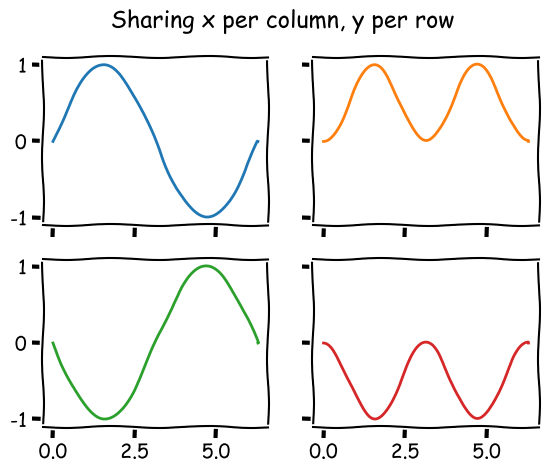

In [98]:
#Subplots in 2 directions 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharex = True, sharey = True)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

***

### Seaborn

Seaborn is an extremely powerful library built on top of matplotlib, and is extremeley useful for data visualization and is much *much* prettier than matplotlib. 

Lets continue with some examples from the mpg dataset and compare them to seaborn

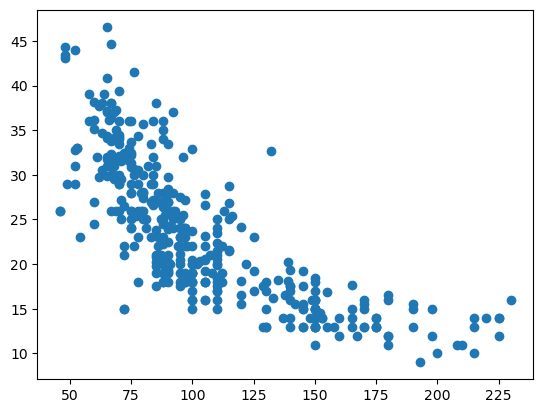

In [99]:
plt.rcdefaults()  #get rid of xkcd

#As a reminder, here's the scatterplot with matplotlib
plt.scatter(mpg['horsepower'],mpg['mpg']);

In [100]:
#Now lets see how nice this looks with seaborn
sns.

SyntaxError: invalid syntax (<ipython-input-100-55abb2a8343f>, line 2)

In [101]:
fmri = sns.load_dataset("gammas")

In [102]:
fmri

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
5,0.0,IPS,5,-0.073709
6,0.0,IPS,6,3.542734
7,0.0,IPS,7,0.080169
8,0.0,IPS,8,1.547083
9,0.0,IPS,9,2.827153


# Now let's look at some EEG Data
## N170 - Face Recognition

<img style="height: 300px; float: right" src="https://www.researchgate.net/profile/Vincent_Walsh3/publication/49833438/figure/fig1/AS:394279194251295@1471014893499/The-P1-and-N170-ERP-components-The-graph-shows-the-grand-average-ERP-responses-from-ten.png"/>

The N170 is a large negative event-related potential (ERP) component that occurs after the detection of faces, but not objects, scrambled faces, or other body parts such as hands. The N170 occurs around 170ms after face perception and is most easily detected at lateral posterior electrodes such as T5 and T6 [1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.601.6917&rep=rep1&type=pdf). Frontal or profile views of human (and animal [2](https://www.ncbi.nlm.nih.gov/pubmed/14995895)) faces elicit the strongest N170 and the strength of the N170 does not seem to be influenced by how familiar a face is. Thus, although there is no consensus on the specific source of the N170, researchers believe it is related to activity in the fusiform face area, an area of the brain that shows a similar response pattern and is involved in encoding the holistic representation of a face (i.e eyes, nose mouth all arranged in the appropriate way).

In this notebook, we will attempt to detect the N170 with the Muse headband using faces and houses as our stimuli. The Muse's temporal electrodes (TP9 and TP10) are well positioned to detect the N170 and we expect we'll be able to see an N170 emerge from just a few dozen trials. We will then run several different classification algorithms on our data in order to evaluate the performance of a potential brain-computer interface using the N170.

## Step 1: Prepare the Data for Analysis
 
Since last week we learned how to acquire and clean data, we will begin where we left off and start analyzing data. There is a folder under Workshop 2 called N170, and it contains sample data which we will be analyzing.

### Load data into MNE objects

[MNE](https://martinos.org/mne/stable/index.html) is a very powerful Python library for analyzing EEG data. It provides helpful functions for performing key tasks such as filtering EEG data, rejecting artifacts, and grouping EEG data into chunks (epochs).

The first step to using MNE is to read the data we've collected into an MNE `Raw` object

In [103]:
import os

# print(os.path.join("../eeg-notebooks", "data", "visual", "N170", "subject" + str(subject), "session" + str(session), ("recording_%s.csv" %
#                                               strftime("%Y-%m-%d-%H.%M.%S", gmtime())) + ".csv"))


# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
# sys.path.insert(0, os.path.dirname(os.path.realpath('')) + '/Workshop 2/utils/utils/')
# sys.path.insert(0, os.path.dirname(os.path.realpath('')) + '/Workshop 2/stimulus_presentation/')
# print(sys.path)
# print(os.listdir('../Workshop 2/utils'))
# print(os.path.dirname(os.path.realpath('')) + '/Workshop 2/utils')


In [111]:
from muselsl import stream, list_muses, view, record
from multiprocessing import Process
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
# from stimulus_presentation import n170
import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')



In [112]:
raw = utils.load_data('visual/N170', sfreq=256., subject_nb=subject, session_nb=session)

AttributeError: module 'utils' has no attribute 'load_data'